R =  -3*sqrt(3)*exp(-t/2)*sin(sqrt(3)*t/2) + exp(-t/2)*cos(sqrt(3)*t/2)
J =  5*sqrt(3)*exp(-t/2)*sin(sqrt(3)*t/2)/3 + exp(-t/2)*cos(sqrt(3)*t/2)


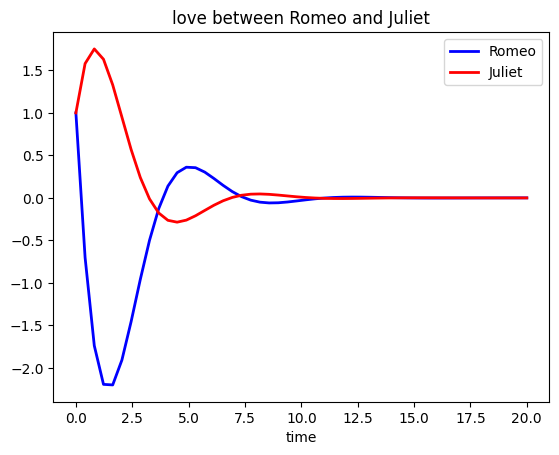

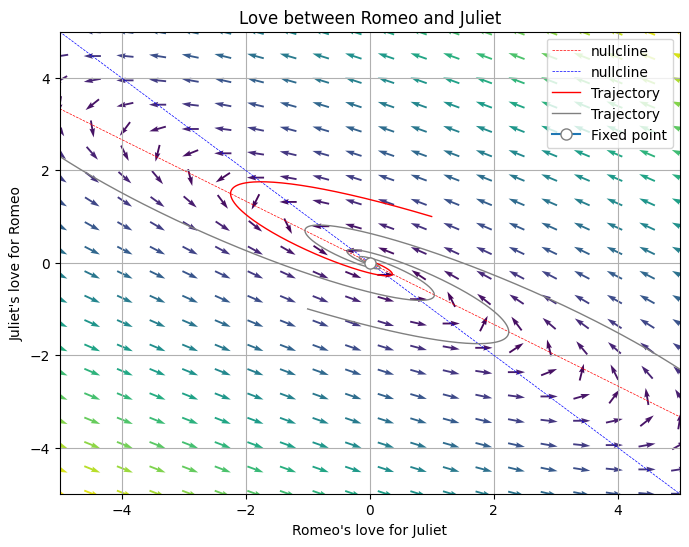

In [43]:
from turtle import color
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, Function, Derivative, Eq, dsolve, solve

a = -2
b = -3
c = 1
d = 1
r0 = 1
j0 = 1

#Solve the system
t = Symbol('t')
r = Function('r')(t)
j = Function('j')(t)
deq1 = Eq(Derivative(r), a*r + b*j)
deq2 = Eq (Derivative(j), c*r + d*j)
system = (deq1, deq2)
s = dsolve(system)
eq1 = s[0].rhs.subs(t,0) - r0
eq2 = s[1].rhs.subs(t,0) - j0
constants = solve([eq1, eq2])
r = s[0].subs(constants)
j = s[1].subs(constants)
r = r.rhs
j = j.rhs
print("R = ", r)
print("J = ", j)


def love(y, t=0):
    
    R = y[0]
    J = y[1]
    dRdt = a*R+b*J
    dJdt = c*R+d*J
    return [dRdt ,dJdt]

t = np.linspace(0,20)
y0= [r0, j0]

y = odeint(love,y0,t)


#plot the solution
plt.plot(t,y[:,0], 'b-', linewidth = 2.0)
plt.plot(t,y[:,1],'r-', linewidth=2.0)
plt.xlabel("time")
# plt.ylabel("y[R,J]")
plt.title("love between Romeo and Juliet")
plt.legend(["Romeo","Juliet"])
# plt.xlim([0, 20])
# plt.ylim([-100, 100])
plt.savefig('images/plot.png')
plt.show()


# draw phase portrait
def f(x,y):
    return a*x+b*y
def g(x,y):
    return c*x+d*y

# initialize lists containing values
x = []
y = []

fp = []

def find_fixed_points(r):
    for x in range(r):
        for y in range(r):
            if ((f(x,y) == 0) and (g(x,y) == 0)):
                fp.append((x,y))
                # print('The system has a fixed point in %s,%s' % (x,y))
    return fp

find_fixed_points(10)

fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

x = np.linspace(0,2,20)
y = np.arange(0,2,20)


# plot nullclines
ax4.plot([-5,5], [-5*(-a/b),5*(-a/b)], 'r--', lw=0.5, label='nullcline')
ax4.plot([-5,5], [-5*(-c/d),5*(-c/d)], 'b--', lw=0.5, label='nullcline')


t = np.linspace(0, 150, 10000)

# Starting point of each trajectory
P0 = [1,1]
# Integrate system of ODEs to get x and y values
P = odeint(love, P0, t)
# Plot each trajectory
ax4.plot( P[:,0], P[:,1],        
        # Assign starting point to trajectory label
        label='Trajectory', color = 'red', lw = 1)
P0 = [-5,5]
# Integrate system of ODEs to get x and y values
P = odeint(love, P0, t)
# Plot each trajectory
ax4.plot( P[:,0], P[:,1],        
        # Assign starting point to trajectory label
        label='Trajectory', color = 'gray', lw = 1)

P0 = [5,-5]
# Integrate system of ODEs to get x and y values
P = odeint(love, P0, t)
# Plot each trajectory
ax4.plot( P[:,0], P[:,1],        
        # Assign starting point to trajectory label
        color = 'gray', lw = 1 )

P0 = [-1,-1]
# Integrate system of ODEs to get x and y values
P = odeint(love, P0, t)
# Plot each trajectory
ax4.plot( P[:,0], P[:,1],        
        # Assign starting point to trajectory label
        color = 'gray', lw = 1 )

# plot fixed points
ax4.plot(0, 0, marker="o", markersize=8, markeredgecolor="grey", markerfacecolor="white", label ="Fixed point")
# for point in fp:
#     ax4.plot(point[0],point[1],"red", marker = "o", markersize = 7.5)
ax4.set_title("Love between Romeo and Juliet")
ax4.set_xlabel("Romeo's love for Juliet")
ax4.set_ylabel("Juliet's love for Romeo")
ax4.legend(loc='best')

# quiverplot
# define a grid and compute direction at each point
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)

X1 , Y1  = np.meshgrid(x, y)                    # create a grid
DX1, DY1 = love([X1, Y1])                        # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows
DY1 /= M

ax4.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
ax4.set_xlim(-5,5)
ax4.set_ylim(-5,5)
ax4.legend()
ax4.grid()